<img src="005pic1.png" width="500">

Last semester, I took PSYC001: Introduction to Psychology at the University of Pennsylvania — arguably one of the most relevant courses to my daily life. Over 80+ pages of notes later, I had learned everything from the brain’s role in speech to the effects of sleep deprivation and social isolation. But one unit stayed with me more than the rest: personality.

Specifically, how it’s formed.

I’ve often wondered just how I became the person I am today. Was my “ambiversion” (sudden swings between extroversion and introversion) shaped by my childhood? Would I be more talkative if I had grown up in a different country? A different family? A different name?

Unfortunately, my professor had no definitive answer. In our final class on personality, she explained that personality is a mix of genetic and environmental factors, and scientists cannot clearly pinpoint which traits come from which source. Some aspects may be inherent, others acquired, but their individual influence cannot be precisely measured. 

Now, in COMM3180, I was given access to a dataset of nearly 20,000 responses from a global Big Five personality survey. With this opportunity, I felt compelled to discover if there is a correlation between certain aspects of an individual and their personality traits.

In this blog post, I aim to examine what shapes personality more: internal factors such as age and gender, or external factors such as country and dominant hand. Through this analysis, I hope to better understand whether nature or nurture plays a more visible role. 

## Are Young People More Extroverted?

In PSYC001, I learned that certain Big Five traits show average changes across age groups. To test this, I first examined whether there was a relationship between age and extroversion (a trait that was commonly used as an example in the class). Using the survey responses, I grouped participants into age ranges (from the 10s through the 70s) and calculated the average extroversion score for each group, and visualized the results in a bar chart.

What I found surprised me.

<img src="005pic2.png" width="600">

In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [40]:
big5_df = pd.read_csv('data/openpsych_data.csv', sep='\t')

In [41]:
negative_items = ['E2', 'E4', 'E6', 'E8', 'E10', 'N2', 'N4', 'A1', 'A3', 'A5', 'A7', 'C2', 'C4', 'C6', 'C8', 'O2', 'O4', 'O6']

In [42]:
for item in negative_items:
    big5_df[item] = 6 - big5_df[item]

In [37]:
E_items = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']
N_items = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']
A_items = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
C_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
O_items = ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']

In [43]:
big5_df['Extroversion'] = big5_df[E_items].sum(axis=1)
big5_df['Neuroticism'] = big5_df[N_items].sum(axis=1)
big5_df['Agreeableness'] = big5_df[A_items].sum(axis=1)
big5_df['Conscientiousness'] = big5_df[C_items].sum(axis=1)
big5_df['Openness'] = big5_df[O_items].sum(axis=1)

In [44]:
traits = ['Extroversion','Neuroticism','Agreeableness','Conscientiousness','Openness']

In [49]:
big5_df['age_group'] = pd.cut(big5_df['age'], bins=[10,20,30,40,50,60,70,80], labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s'])

In [50]:
ages_extroversion = big5_df.groupby('age_group')['Extroversion'].mean()

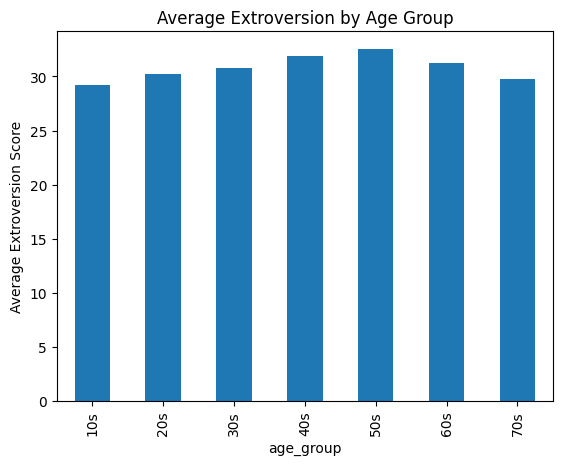

In [51]:
ages_extroversion.plot(kind='bar')
plt.title("Average Extroversion by Age Group")
plt.ylabel("Average Extroversion Score")
plt.show()

My assumption that extraversion steadily decreases with age was only partially correct. In this sample of 20,000 people, extroversion actually increased slightly from the younger age groups into midlife. Individuals in their 10s and 30s scored around 27–31, while those in their 40s and 50s averaged closer to 35. It wasn’t until the 60s and 70s that extroversion declined back to levels similar to the youngest groups.

While extroversion does decrease later in life, I didn’t expect it to rise into midlife first. Perhaps individuals in their 40s and 50s experience greater emotional or financial stability, making them more socially confident. The later decline could relate to health changes or lifestyle shifts. Although the data alone cannot explain the reasons, it made me curious whether other traits would reveal clearer patterns.

## Are Young People More Emotionally Reactive?

As a college student, I can admit that I often feel stressed. My parents, on the other hand, seem significantly less reactive to daily pressures (perhaps because my siblings and I are out of the house). This led me to explore whether neuroticism has a relationship with age.

Using the same age group method, I calculated the average neuroticism score for each group and visualized it in a line plot to observe any upward or downward trends.

What I found was much clearer.

In [52]:
age_neuroticism = big5_df.groupby('age_group')['Neuroticism'].mean()

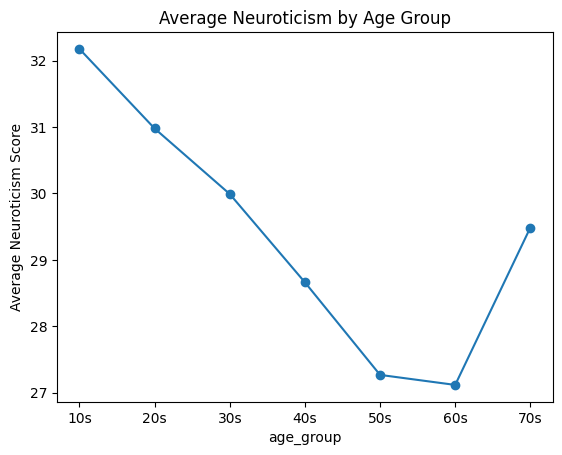

In [53]:
age_neuroticism.plot(kind='line', marker='o')
plt.title("Average Neuroticism by Age Group")
plt.ylabel("Average Neuroticism Score")
plt.show()

Neuroticism steadily decreases from the 10s through the 60s, nearly a five-point difference. This is reassuring for someone currently in the youngest age group. Interestingly, neuroticism increases again in the 70s. This could reflect health challenges or other stressors associated with aging. While I cannot determine causation, the pattern suggests that emotional reactivity evolves across the lifespan.

## What About Your Dominant Hand?

Another internal factor I wanted to examine was dominant writing hand. Since handedness has biological roots, I wondered whether it might show noticeable differences in personality traits. Using the same approach as before, I created a bar chart comparing average Big Five scores across right-handed, left-handed, and ambidextrous individuals.

What I found was unexpected.

In [72]:
big5_df['hand'] = big5_df['hand'].replace({1: 'Right', 2: 'Left', 3: 'Ambidextrous', 0: 'Missed'})

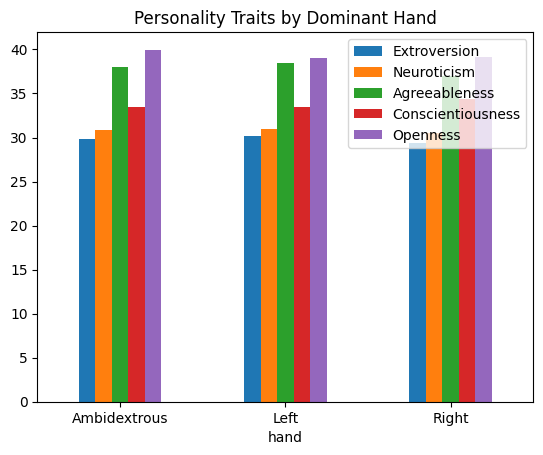

In [73]:
hand_traits = big5_df.groupby('hand')[['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

hand_traits.plot(kind='bar')
plt.title("Personality Traits by Dominant Hand")
plt.xticks(rotation=0)
plt.show()

Most traits (conscientiousness, neuroticism, and extraversion) showed very similar averages across groups. However, openness and agreeableness ever so slightly stood out. Ambidextrous individuals scored slightly higher in openness (around 39) compared to left or right handed individuals (around 37). Moreover, right handed individuals had slightly higher conscientiousness levels.

While this observation is small and quite insignificant, I can't help but wonder if ambidextrous individuals may already demonstrate flexibility or experimentation in developing both hands, which could reflect broader openness to experiences. Additionally, since majority of people are right handed, this could explain lower levels of agreeableness because there's a larger pool. While speculative, this finding could be a more interesting biological pattern in the data.

## The Gender Personality Gap

As I continued analyzing internal factors, I examined gender. There are common assumptions that women are more agreeable or emotionally expressive, but I wanted to see what the data showed. I grouped responses into “Other,” “Male,” “Female,” and “Prefer not to say,” then averaged their Big Five scores.

What I found was more nuanced than popular narratives suggest.

In [69]:
big5_df['gender'] = big5_df['gender'].replace({
    0: 'Missed',
    1: 'Male',
    2: 'Female',
    3: 'Other'
})

In [70]:
gender_differences = big5_df.groupby('gender')[['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

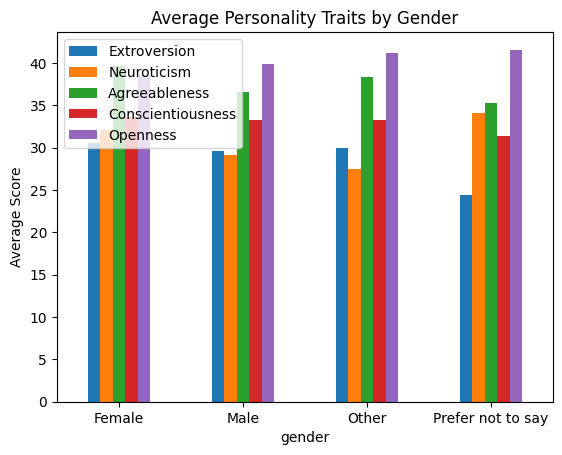

In [71]:
gender_differences.plot(kind='bar')
plt.title("Average Personality Traits by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

There are differences, but they are smaller than many people expect. Conscientiousness was nearly identical across groups, hovering around 32–33. Other traits such as agreeableness, openness, neuroticism, and extraversion showed some variation, but nothing dramatic.

These differences could stem from social expectations, stereotypes, or cultural context. However, the data alone cannot fully explain them. Still, the relatively small gaps suggest that gender does not overwhelmingly dictate all aspects personality. Through this, I wanted to see personality influences on a broader more external scale.

## Does Culture Shape Personality?

If personality were purely individual, country shouldn’t matter much. From PSYC001, I knew culture likely plays a role, particularly in traits like agreeableness. For example, societies that emphasize hierarchy and respect are often described as more agreeable (such as East Asian countries: Japan, South Korea)

Using the most represented countries (Top 10) in the dataset, I compared their average agreeableness scores.

<img src="005pic3.png" width="500">

In [61]:
top_countries = big5_df['country'].value_counts().head(10).index

In [62]:
country_data = big5_df[big5_df['country'].isin(top_countries)]

In [63]:
country_agreeableness = country_data.groupby('country')['Agreeableness'].mean()

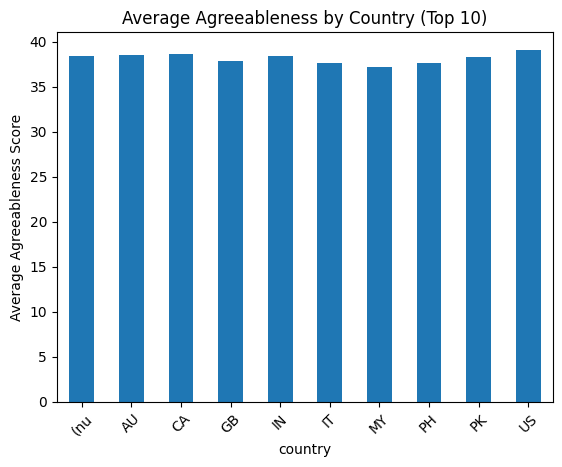

In [64]:
country_agreeableness.plot(kind='bar')
plt.title("Average Agreeableness by Country (Top 10)")
plt.ylabel("Average Agreeableness Score")
plt.xticks(rotation=45)
plt.show()

Surprisingly, the averages were remarkably similar, generally around 37. However, I do not that this could reflect the sample being heavily North American and European, potentially limiting variation.

Since averages did not reveal much difference, I looked deeper by comparing the standard deviation of agreeableness within each country.

This shift in perspective revealed something more meaningful.

In [65]:
top_countries = big5_df['country'].value_counts().head(10).index
country_data = big5_df[big5_df['country'].isin(top_countries)]

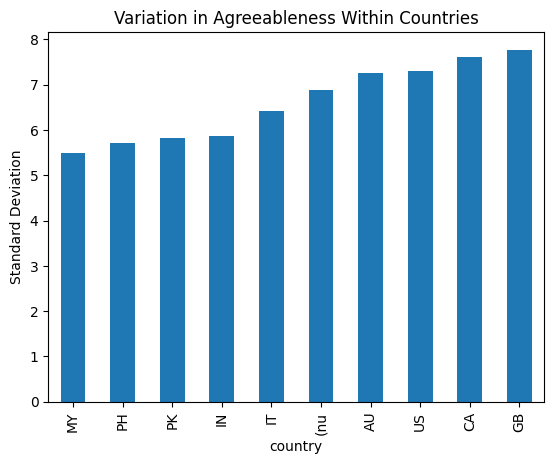

In [66]:
country_variation = country_data.groupby('country')['Agreeableness'].std()

country_variation.sort_values().plot(kind='bar')
plt.title("Variation in Agreeableness Within Countries")
plt.ylabel("Standard Deviation")
plt.show()

Countries commonly described as individualistic (such as the United States, Canada, and the United Kingdom) showed higher variation in agreeableness. In contrast, countries like Malaysia and the Philippines showed lower variation, meaning individuals’ scores were more clustered.

While the average levels were similar, the spread differed. This suggests that culture may not drastically change the overall level of a trait but may influence how similar individuals within a society are to one another.

## Conclusion: What Shapes Us Most?

Across nearly 20,000 individuals, my data suggests that personality is influenced more by life stage than by fixed demographic categories. Age showed the most consistent and visible patterns, particularly in traits like extraversion and neuroticism, which shifted gradually across decades. 

Gender differences were present, but the gaps between averages were relatively small compared to the variation within each group. This suggests that while gender may correlate with certain traits, it does not strongly determine personality outcomes. Similarly, biological characteristics such as dominant hand showed only minor differences, indicating that innate physical traits do not meaningfully predict overall personality.

Location and cultural background revealed variation in distributions rather than dramatic shifts in average scores. In other words, people across countries were more similar than different, but the spread of traits within countries differed. This implies that social environments may shape how personality traits are expressed rather than fundamentally altering the traits themselves.

Altogether, my findings support a combined interpretation: personality appears to be shaped gradually through developmental processes and social context rather than determined by any single demographic factor. Age emerges as the most influential variable in this dataset, suggesting that personality evolves alongside life experience.